## Import Modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import os 
import scipy.io
from scipy import stats
from __future__ import print_function
import pandas as pd
from numpy import *

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from scipy import stats
import pandas as pd

## Load connectome data, organize matrix

In [17]:
test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_AD.mat')
AD_2009=np.array(test['connectome'])
print(AD_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_count.mat')
count_2009=np.array(test['connectome'])
print(count_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_FA.mat')
FA_2009=np.array(test['connectome'])
print(FA_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_length.mat')
length_2009=np.array(test['connectome'])
print(length_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_MD.mat')
MD_2009=np.array(test['connectome'])
print(MD_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_RD.mat')
RD_2009=np.array(test['connectome'])
print(RD_2009.shape)




test=scipy.io.loadmat('Connectome_group_aparc+aseg_AD.mat')
AD_aseg=np.array(test['connectome'])
print(AD_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_count.mat')
count_aseg=np.array(test['connectome'])
print(count_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_FA.mat')
FA_aseg=np.array(test['connectome'])
print(FA_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_length.mat')
length_aseg=np.array(test['connectome'])
print(length_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_MD.mat')
MD_aseg=np.array(test['connectome'])
print(MD_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_RD.mat')
RD_aseg=np.array(test['connectome'])
print(RD_aseg.shape)

zero_AD=np.zeros([164,164,303])
zero_count=np.zeros([164,164,303])
zero_FA=np.zeros([164,164,303])
zero_length=np.zeros([164,164,303])
zero_MD=np.zeros([164,164,303])
zero_RD=np.zeros([164,164,303])

zero_AD[40:124,40:124,:]=AD_aseg
zero_count[40:124,40:124,:]=count_aseg
zero_FA[40:124,40:124,:]=FA_aseg
zero_length[40:124,40:124,:]=length_aseg
zero_MD[40:124,40:124,:]=MD_aseg
zero_RD[40:124,40:124,:]=RD_aseg


X=np.zeros([164,164,303,12])
X[:,:,:,0]=AD_2009
X[:,:,:,1]=count_2009
X[:,:,:,2]=FA_2009
X[:,:,:,3]=length_2009
X[:,:,:,4]=MD_2009
X[:,:,:,5]=RD_2009
X[:,:,:,6]=zero_AD
X[:,:,:,7]=zero_count
X[:,:,:,8]=zero_FA
X[:,:,:,9]=zero_length
X[:,:,:,10]=zero_MD
X[:,:,:,11]=zero_RD


print(X.shape)
X=X.transpose([2,0,1,3])
print(X.shape)

(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(164, 164, 303, 12)
(303, 164, 164, 12)


## Read in data and labels, organize data for classification

In [18]:
alldata=pd.read_csv('PLA_MOR_136_v1.csv',header=0)
print(alldata.shape)
alldata=np.array(alldata)
datasubjid=alldata[:,0]

list_subjs=pd.read_csv('list_subject_303_connectome.csv',header=0)
#list_subjs=list_subjs.apply(lambda x: x.str.slice(0,6))
print(list_subjs.shape)


filtindex=np.isin(list_subjs,datasubjid)
filtindex=filtindex.ravel()

X=X[filtindex]
print(X.shape)
listofx=list_subjs[filtindex]
#print(listofx)

reverseindex=np.isin(datasubjid,list_subjs)
reverseindex=reverseindex.ravel()
print(reverseindex.shape)

y=alldata[:,1]
y=np.array(y,dtype=np.float64)
y=y[reverseindex]
labelofy=alldata[:,0]
labelofy=labelofy[reverseindex]
print(y.shape)


removeblank=isnan(y)
y_connectome_plac=y[~removeblank]
#print(y_connectome.shape)

X=X[~removeblank]
print(X.shape)

newalldata=pd.read_csv('PLA_MOR_136_v1.csv',header=0)
newalldata=np.array(newalldata)
newalldata=newalldata[reverseindex,:]
newalldata=newalldata[~removeblank,:]

Xvar=newalldata[:,(2,4,7,8,25,1047,1048,1049,1050,1051,1052,1053,1054)]
print(Xvar.shape)
Xvar=np.array(Xvar,dtype=np.float32)
wherenan=isnan(Xvar)
Xvar[wherenan]=0

delta_track=newalldata[:,19]-newalldata[:,7]


delta_track_plac=delta_track
Xvar_plac=Xvar


(136, 1055)
(303, 1)
(134, 164, 164, 12)
(136,)
(134,)
(111, 164, 164, 12)
(111, 13)


In [19]:
fill=np.zeros([111,164,164,12])

fill[:,:,:,0]=stats.zscore(X[:,:,:,0])
fill[:,:,:,1]=stats.zscore(X[:,:,:,1])
fill[:,:,:,2]=stats.zscore(X[:,:,:,2])
fill[:,:,:,3]=stats.zscore(X[:,:,:,3])
fill[:,:,:,4]=stats.zscore(X[:,:,:,4])
fill[:,:,:,5]=stats.zscore(X[:,:,:,5])
fill[:,:,:,6]=stats.zscore(X[:,:,:,6])
fill[:,:,:,7]=stats.zscore(X[:,:,:,7])
fill[:,:,:,8]=stats.zscore(X[:,:,:,8])
fill[:,:,:,9]=stats.zscore(X[:,:,:,9])
fill[:,:,:,10]=stats.zscore(X[:,:,:,10])
fill[:,:,:,11]=stats.zscore(X[:,:,:,11])
wherenan=isnan(fill)
fill[wherenan]=0
X_connectome_plac=fill

C:\Users\choyale\AppData\Local\Continuum\miniconda3\envs\tfpls\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


## Freesurfer data load in

In [20]:
test=scipy.io.loadmat('fs_group_aparc_all_4_measures_in_matrix.mat')
aparc_free=np.array(test['DATA'])
print(aparc_free.shape)

test=scipy.io.loadmat('fs_group_aparc2009_all_4_measures_in_matrix.mat')
aparc2009_free=np.array(test['DATA'])
print(aparc2009_free.shape)

X=np.concatenate((aparc_free,aparc2009_free),axis=3)
print(X.shape)

X=X.transpose([2,0,1,3])
print(X.shape)

(13, 13, 323, 4)
(13, 13, 323, 4)
(13, 13, 323, 8)
(323, 13, 13, 8)


In [21]:
alldata=pd.read_csv('PLA_MOR_136_v1.csv',header=0)
print(alldata.shape)
alldata=np.array(alldata)
datasubjid=alldata[:,0]

list_subjs=pd.read_csv('list_fs_all_323.csv',header=0)
list_subjs=list_subjs.apply(lambda x: x.str.slice(0,6))
print(list_subjs.shape)



filtindex=np.isin(list_subjs,labelofy)
filtindex=filtindex.ravel()

X=X[filtindex]
print(X.shape)

X=X[~removeblank]
print(X.shape)


(136, 1055)
(323, 1)
(134, 13, 13, 8)
(111, 13, 13, 8)


In [22]:
fill=np.zeros([111,13,13,8])

fill[:,:,:,0]=stats.zscore(X[:,:,:,0])
fill[:,:,:,1]=stats.zscore(X[:,:,:,1])
fill[:,:,:,2]=stats.zscore(X[:,:,:,2])
fill[:,:,:,3]=stats.zscore(X[:,:,:,3])
fill[:,:,:,4]=stats.zscore(X[:,:,:,4])
fill[:,:,:,5]=stats.zscore(X[:,:,:,5])
fill[:,:,:,6]=stats.zscore(X[:,:,:,6])
fill[:,:,:,7]=stats.zscore(X[:,:,:,7])
wherenan=isnan(fill)
fill[wherenan]=0
X_freesurf=fill

C:\Users\choyale\AppData\Local\Continuum\miniconda3\envs\tfpls\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [23]:
zeropad=np.zeros([111,164,164,8])
zeropad[:,76:89,76:89,:]=X_freesurf
X_freesurf_plac=zeropad
print(X_freesurf.shape)

(111, 13, 13, 8)


## Treatment load

In [24]:
test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_AD.mat')
AD_2009=np.array(test['connectome'])
print(AD_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_count.mat')
count_2009=np.array(test['connectome'])
print(count_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_FA.mat')
FA_2009=np.array(test['connectome'])
print(FA_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_length.mat')
length_2009=np.array(test['connectome'])
print(length_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_MD.mat')
MD_2009=np.array(test['connectome'])
print(MD_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_RD.mat')
RD_2009=np.array(test['connectome'])
print(RD_2009.shape)




test=scipy.io.loadmat('Connectome_group_aparc+aseg_AD.mat')
AD_aseg=np.array(test['connectome'])
print(AD_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_count.mat')
count_aseg=np.array(test['connectome'])
print(count_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_FA.mat')
FA_aseg=np.array(test['connectome'])
print(FA_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_length.mat')
length_aseg=np.array(test['connectome'])
print(length_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_MD.mat')
MD_aseg=np.array(test['connectome'])
print(MD_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_RD.mat')
RD_aseg=np.array(test['connectome'])
print(RD_aseg.shape)

zero_AD=np.zeros([164,164,303])
zero_count=np.zeros([164,164,303])
zero_FA=np.zeros([164,164,303])
zero_length=np.zeros([164,164,303])
zero_MD=np.zeros([164,164,303])
zero_RD=np.zeros([164,164,303])

zero_AD[40:124,40:124,:]=AD_aseg
zero_count[40:124,40:124,:]=count_aseg
zero_FA[40:124,40:124,:]=FA_aseg
zero_length[40:124,40:124,:]=length_aseg
zero_MD[40:124,40:124,:]=MD_aseg
zero_RD[40:124,40:124,:]=RD_aseg


X=np.zeros([164,164,303,12])
X[:,:,:,0]=AD_2009
X[:,:,:,1]=count_2009
X[:,:,:,2]=FA_2009
X[:,:,:,3]=length_2009
X[:,:,:,4]=MD_2009
X[:,:,:,5]=RD_2009
X[:,:,:,6]=zero_AD
X[:,:,:,7]=zero_count
X[:,:,:,8]=zero_FA
X[:,:,:,9]=zero_length
X[:,:,:,10]=zero_MD
X[:,:,:,11]=zero_RD


print(X.shape)
X=X.transpose([2,0,1,3])
print(X.shape)

alldata=pd.read_csv('SER_MOR_136.csv',header=0)
print(alldata.shape)
alldata=np.array(alldata)
datasubjid=alldata[:,0]

list_subjs=pd.read_csv('list_subject_303_connectome.csv',header=0)
#list_subjs=list_subjs.apply(lambda x: x.str.slice(0,6))
print(list_subjs.shape)


filtindex=np.isin(list_subjs,datasubjid)
filtindex=filtindex.ravel()

X=X[filtindex]
print(X.shape)

reverseindex=np.isin(datasubjid,list_subjs)
reverseindex=reverseindex.ravel()
print(reverseindex.shape)

y=alldata[:,1]
y=np.array(y,dtype=np.float64)
y=y[reverseindex]
labelofy=alldata[:,0]
labelofy=labelofy[reverseindex]
print(y.shape)


removeblank=isnan(y)
y_connectome_treat=y[~removeblank]
print(y.shape)

X=X[~removeblank]
print(X.shape)

newalldata=pd.read_csv('SER_MOR_136_v1.csv',header=0)
newalldata=np.array(newalldata)
newalldata=newalldata[reverseindex,:]
newalldata=newalldata[~removeblank,:]

Xvar=newalldata[:,(2,4,7,8,25,1047,1048,1049,1050,1051,1052,1053,1054)]
print(Xvar.shape)
Xvar=np.array(Xvar,dtype=np.float32)
wherenan=isnan(Xvar)
Xvar[wherenan]=0

Xvar_treat=Xvar

delta_track=newalldata[:,19]-newalldata[:,7]
delta_track_treat=delta_track

fill=np.zeros([100,164,164,12])

fill[:,:,:,0]=stats.zscore(X[:,:,:,0])
fill[:,:,:,1]=stats.zscore(X[:,:,:,1])
fill[:,:,:,2]=stats.zscore(X[:,:,:,2])
fill[:,:,:,3]=stats.zscore(X[:,:,:,3])
fill[:,:,:,4]=stats.zscore(X[:,:,:,4])
fill[:,:,:,5]=stats.zscore(X[:,:,:,5])
fill[:,:,:,6]=stats.zscore(X[:,:,:,6])
fill[:,:,:,7]=stats.zscore(X[:,:,:,7])
fill[:,:,:,8]=stats.zscore(X[:,:,:,8])
fill[:,:,:,9]=stats.zscore(X[:,:,:,9])
fill[:,:,:,10]=stats.zscore(X[:,:,:,10])
fill[:,:,:,11]=stats.zscore(X[:,:,:,11])
wherenan=isnan(fill)
fill[wherenan]=0
X_connectome_treat=fill

test=scipy.io.loadmat('fs_group_aparc_all_4_measures_in_matrix.mat')
aparc_free=np.array(test['DATA'])
print(aparc_free.shape)

test=scipy.io.loadmat('fs_group_aparc2009_all_4_measures_in_matrix.mat')
aparc2009_free=np.array(test['DATA'])
print(aparc2009_free.shape)

X=np.concatenate((aparc_free,aparc2009_free),axis=3)
print(X.shape)

X=X.transpose([2,0,1,3])
print(X.shape)

alldata=pd.read_csv('SER_MOR_136.csv',header=0)
print(alldata.shape)
alldata=np.array(alldata)
datasubjid=alldata[:,0]

list_subjs=pd.read_csv('list_fs_all_323.csv',header=0)
list_subjs=list_subjs.apply(lambda x: x.str.slice(0,6))
print(list_subjs.shape)



filtindex=np.isin(list_subjs,labelofy)
filtindex=filtindex.ravel()

X=X[filtindex]
print(X.shape)

X=X[~removeblank]
print(X.shape)

fill=np.zeros([100,13,13,8])

fill[:,:,:,0]=stats.zscore(X[:,:,:,0])
fill[:,:,:,1]=stats.zscore(X[:,:,:,1])
fill[:,:,:,2]=stats.zscore(X[:,:,:,2])
fill[:,:,:,3]=stats.zscore(X[:,:,:,3])
fill[:,:,:,4]=stats.zscore(X[:,:,:,4])
fill[:,:,:,5]=stats.zscore(X[:,:,:,5])
fill[:,:,:,6]=stats.zscore(X[:,:,:,6])
fill[:,:,:,7]=stats.zscore(X[:,:,:,7])
wherenan=isnan(fill)
fill[wherenan]=0
X_freesurf=fill

zeropad=np.zeros([100,164,164,8])
zeropad[:,76:89,76:89,:]=X_freesurf
X_freesurf_treat=zeropad
print(X_freesurf.shape)

(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(164, 164, 303, 12)
(303, 164, 164, 12)
(136, 1047)
(303, 1)
(129, 164, 164, 12)
(136,)
(129,)
(129,)
(100, 164, 164, 12)
(100, 13)


C:\Users\choyale\AppData\Local\Continuum\miniconda3\envs\tfpls\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


(13, 13, 323, 4)
(13, 13, 323, 4)
(13, 13, 323, 8)
(323, 13, 13, 8)
(136, 1047)
(323, 1)
(129, 13, 13, 8)
(100, 13, 13, 8)
(100, 13, 13, 8)


In [28]:
X_connectome=np.concatenate((X_connectome_plac,X_connectome_treat),axis=0)
X_freesurf=np.concatenate((X_freesurf_plac,X_freesurf_treat),axis=0)
Xvar=np.concatenate((Xvar_plac,Xvar_treat),axis=0)
delta_track=np.concatenate((delta_track_plac,delta_track_treat),axis=0)

y_connectome=np.concatenate((y_connectome_plac,y_connectome_treat),axis=0)

## connectome all

In [42]:
Xnew=X_connectome

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 53.48837209302326%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:216 accuracy: 55.81395348837209%
epoch 13 
Best validation accuracy! iteration:234 accuracy: 58.13953488372093%
epoch 14 
Best validation accuracy! iteration:252 accuracy: 62.7906976744186%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Best validation accuracy! iteration:90

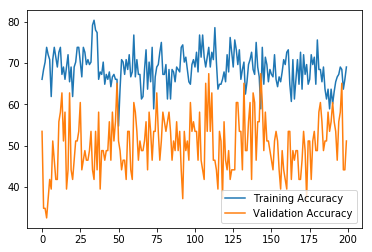

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 40.476190476190474%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 50.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:324 accuracy: 52.38095238095238%
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
Best validation accuracy! iteration:612 accuracy: 54.76190476190476%
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 


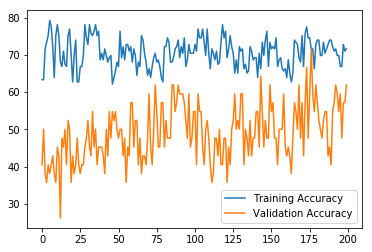

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 50.0%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 52.38095238095238%
epoch 3 
epoch 4 
Best validation accuracy! iteration:72 accuracy: 54.76190476190476%
epoch 5 
Best validation accuracy! iteration:90 accuracy: 59.523809523809526%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:252 accuracy: 61.904761904761905%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
Best validation accuracy! iteration:558 accuracy: 64.28571428571428%
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epo

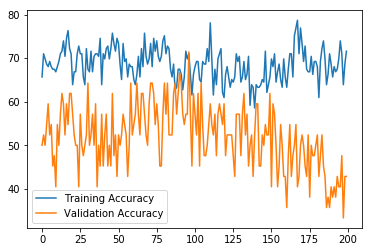

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 45.23809523809524%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 47.61904761904762%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:180 accuracy: 52.38095238095238%
epoch 11 
epoch 12 
Best validation accuracy! iteration:216 accuracy: 54.76190476190476%
epoch 13 
Best validation accuracy! iteration:234 accuracy: 57.142857142857146%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
Best validation accuracy! iteration:612 accuracy: 59.523809523809526%
epoch 35 
Best validation accuracy! iteration:630 accuracy

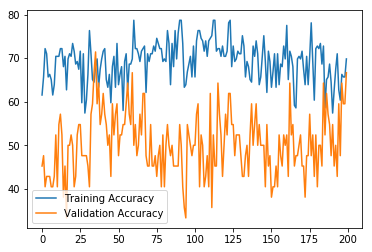

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 59.523809523809526%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 61.904761904761905%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:288 accuracy: 64.28571428571428%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

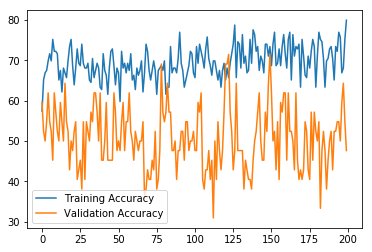

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 60.46511627906977%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 65.11627906976744%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 

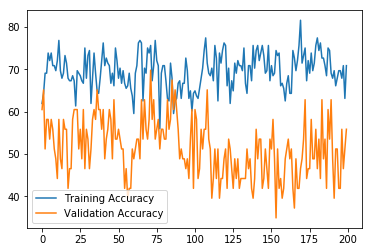

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 54.76190476190476%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 57.142857142857146%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
Best validation accuracy! iteration:594 accuracy: 59.523809523809526%
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

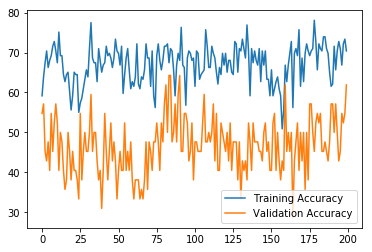

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 52.38095238095238%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:270 accuracy: 59.523809523809526%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
Best validation accuracy! iteration:576 accuracy: 61.904761904761905%
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
Best validation accuracy! iteration:810 accuracy: 64.28571428571428%
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch

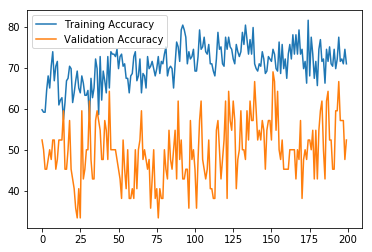

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 59.523809523809526%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 61.904761904761905%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:126 accuracy: 69.04761904761905%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

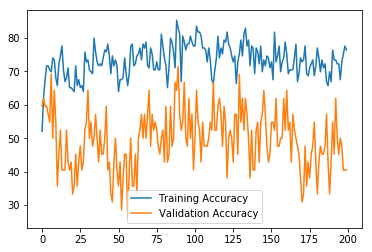

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 52.38095238095238%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:72 accuracy: 57.142857142857146%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
Best validation accuracy! iteration:468 accuracy: 59.523809523809526%
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
Best validation accuracy! iteration:666 accuracy: 64.28571428571428%
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 

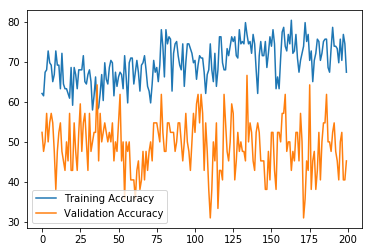

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 48.83720930232558%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 51.16279069767442%
epoch 3 
Best validation accuracy! iteration:54 accuracy: 58.13953488372093%
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 60.46511627906977%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 


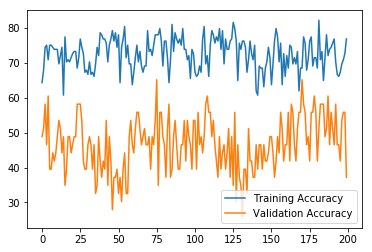

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 38.095238095238095%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 42.857142857142854%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:108 accuracy: 45.23809523809524%
epoch 7 
epoch 8 
Best validation accuracy! iteration:144 accuracy: 47.61904761904762%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:234 accuracy: 50.0%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
Best validation accuracy! iteration:378 accuracy: 52.38095238095238%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
Best validation accur

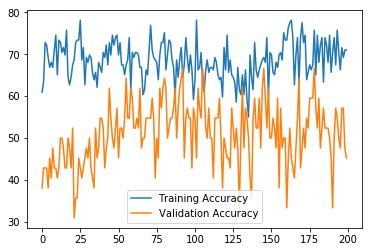

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 57.142857142857146%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 61.904761904761905%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:270 accuracy: 66.66666666666666%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

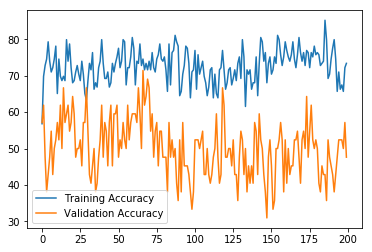

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 57.142857142857146%
epoch 2 
epoch 3 
Best validation accuracy! iteration:54 accuracy: 69.04761904761905%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch

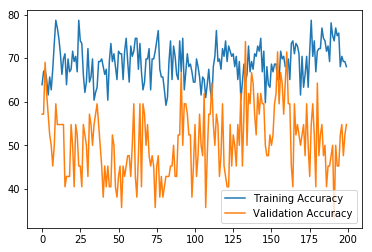

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 45.23809523809524%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 52.38095238095238%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 54.76190476190476%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:342 accuracy: 59.523809523809526%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:432 accuracy: 61.904761904761905%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
Best validation accuracy! iteration:522 accuracy: 64.28571428571428%
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 

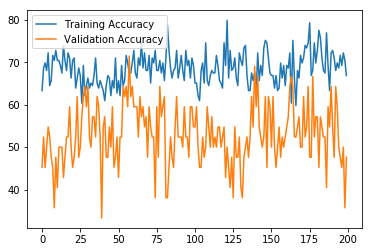

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 51.16279069767442%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:162 accuracy: 53.48837209302326%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:252 accuracy: 55.81395348837209%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
Best validation accuracy! iteration:522 accuracy: 58.13953488372093%
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
Best validation accuracy! iteration:864 accuracy: 60.4651

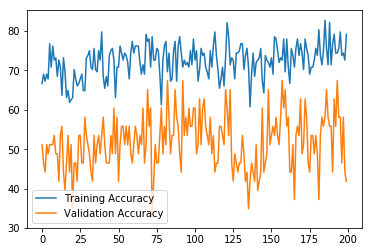

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 42.857142857142854%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 57.142857142857146%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:180 accuracy: 61.904761904761905%
epoch 11 
epoch 12 
Best validation accuracy! iteration:216 accuracy: 64.28571428571428%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch

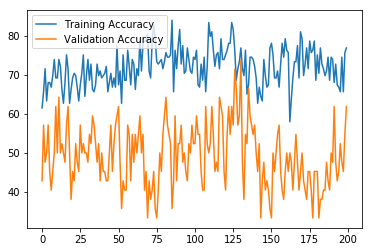

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 42.857142857142854%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 47.61904761904762%
epoch 3 
Best validation accuracy! iteration:54 accuracy: 54.76190476190476%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:252 accuracy: 59.523809523809526%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 5

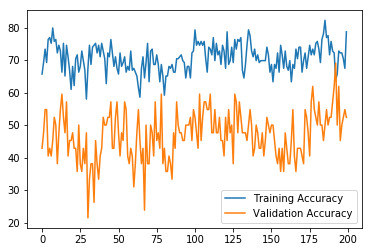

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 54.76190476190476%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 59.523809523809526%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:162 accuracy: 61.904761904761905%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
Best validation accuracy! iteration:954 accuracy: 71.42857142857143%
epoch 

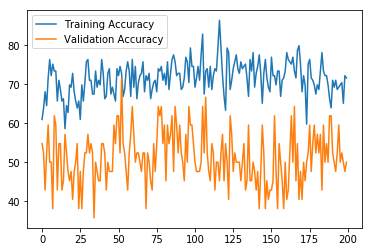

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 52.38095238095238%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:180 accuracy: 54.76190476190476%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:270 accuracy: 69.04761904761905%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 

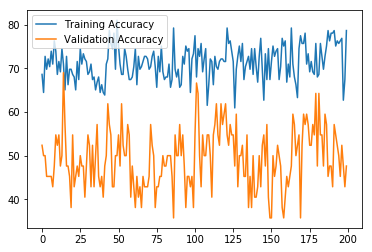

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 55.81395348837209%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 58.13953488372093%
epoch 6 
Best validation accuracy! iteration:108 accuracy: 60.46511627906977%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:216 accuracy: 65.11627906976744%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54

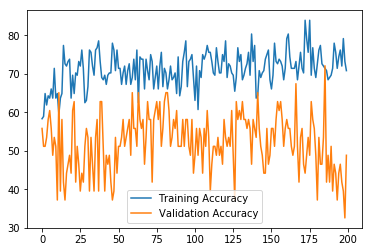

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 50.0%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 54.76190476190476%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:144 accuracy: 57.142857142857146%
epoch 9 
Best validation accuracy! iteration:162 accuracy: 61.904761904761905%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 

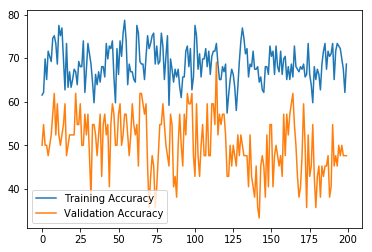

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 54.76190476190476%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
Best validation accuracy! iteration:414 accuracy: 57.142857142857146%
epoch 24 
Best validation accuracy! iteration:432 accuracy: 69.04761904761905%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

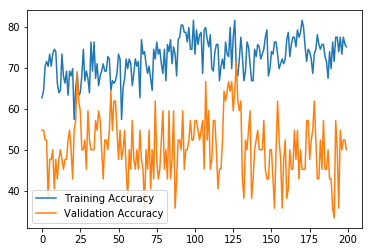

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 45.23809523809524%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 54.76190476190476%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:270 accuracy: 61.904761904761905%
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:324 accuracy: 64.28571428571428%
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 5

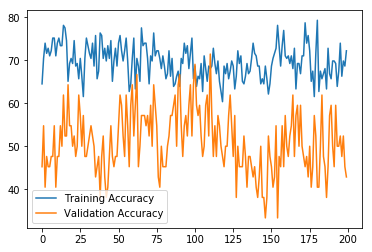

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 52.38095238095238%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:126 accuracy: 57.142857142857146%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:342 accuracy: 59.523809523809526%
epoch 20 
epoch 21 
Best validation accuracy! iteration:378 accuracy: 64.28571428571428%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch

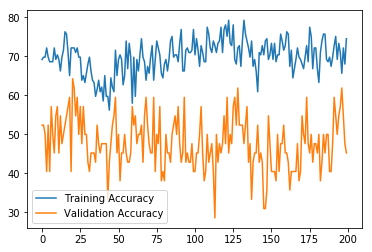

 average accuracy is:  69.67441860465117
 standard deviation is:  2.678157602218133
Sensitivity mean:  0.6631578947368421
Sensitivity std:  0.06821832314113536
Specificity mean:  0.7242028985507245
Specificity std:  0.05509457984610102
F1s mean:  0.6619225149357294
F1s std:  0.03704687767140722


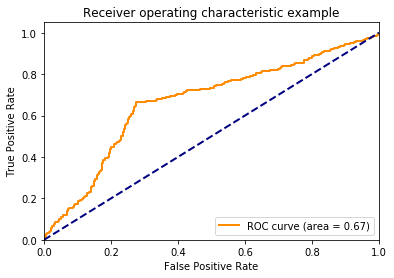

In [43]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_flexchannel import cnn_training
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn import metrics

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
result_accuracies=[]
result_sensitivity=[]
result_specificity=[]
result_f1s=[]
store_proba=[]
store_predictedv=[]
store_percent=[]

for train_index,test_index in rskf.split(Xnew,y_connectome):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xnew[train_index],Xnew[test_index]
    y_train,y_test=y_connectome[train_index],y_connectome[test_index]
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]

    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel,percentage=cnn_training(X_train,y_train,X_test,y_test,fc_units=[2000,100,2], 
                 conv_featmap=[5,5,5],l2_norm=0.1,seed=235,
                 learning_rate=1e-2,epoch=200,batch_size=9,imglen=164,channum=12)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()
    
    log_f1 = f1_score(roc_truelabel,roc_pred)
    log_confuse= metrics.confusion_matrix(roc_truelabel,roc_pred)
    TP = log_confuse[1, 1]
    TN = log_confuse[0, 0]
    FP = log_confuse[0, 1]
    FN = log_confuse[1, 0]
    log_sen=metrics.recall_score(roc_truelabel,roc_pred)
    log_spec=TN / (TN + FP)
    result_accuracies.append(record_acc)
    result_sensitivity.append(log_sen)
    result_specificity.append(log_spec)
    result_f1s.append(log_f1)
    
    probability=np.zeros([test_index.shape[0]])
    #index_percent=np.argmax(percentage,axis=1)
    for i in range(len(roc_pred)):
        if roc_pred[i]==0:
            probability[i]=percentage[i,1]
        else:
            probability[i]=percentage[i,1]
    store_proba.extend(probability)
    store_predictedv.extend(roc_pred)
    store_percent.extend(percentage)

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print(' average accuracy is: ',mean_acc)
print(' standard deviation is: ',mean_std)

mean_sen=np.mean(np.array(result_sensitivity))
std_sen=np.std(np.array(result_sensitivity))
mean_spec=np.mean(np.array(result_specificity))
std_spec=np.std(np.array(result_specificity))
mean_f1s=np.mean(np.array(result_f1s))
std_f1s=np.std(np.array(result_f1s))
print('Sensitivity mean: ',mean_sen)
print('Sensitivity std: ',std_sen)
print('Specificity mean: ',mean_spec)
print('Specificity std: ',std_spec)
print('F1s mean: ',mean_f1s)
print('F1s std: ',std_f1s)



fpr,tpr,_=roc_curve(truelabel,store_proba)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/embarc_project/Figures/both_conall_curve_CNN.pdf')
plt.show()

scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_percentage.mat',mdict={'result':store_percent})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_truelabels.mat',mdict={'result':truelabel})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_predictedv.mat',mdict={'result':store_predictedv})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_probabilities.mat',mdict={'result':store_proba})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_sensitivity.mat',mdict={'result':result_sensitivity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_specificity.mat',mdict={'result':result_specificity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_f1s.mat',mdict={'result':result_f1s})


## morph+connectome all

In [44]:
Xnew=np.concatenate((X_connectome,X_freesurf),axis=3)
print(Xnew.shape)

(211, 164, 164, 20)


Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 62.7906976744186%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
Best validation accuracy! iteration:468 accuracy: 72.09302325581396%
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 

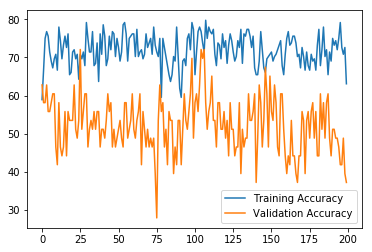

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 45.23809523809524%
epoch 2 
epoch 3 
Best validation accuracy! iteration:54 accuracy: 52.38095238095238%
epoch 4 
Best validation accuracy! iteration:72 accuracy: 59.523809523809526%
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:126 accuracy: 64.28571428571428%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54

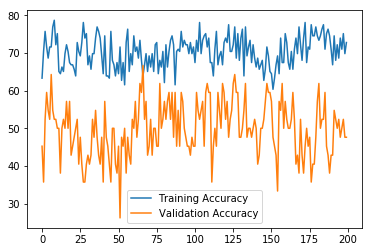

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 57.142857142857146%
epoch 2 
epoch 3 
Best validation accuracy! iteration:54 accuracy: 59.523809523809526%
epoch 4 
Best validation accuracy! iteration:72 accuracy: 61.904761904761905%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

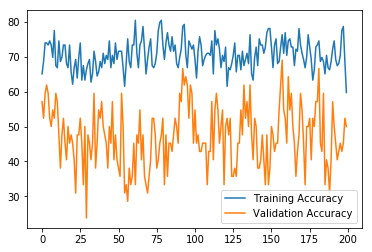

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 40.476190476190474%
epoch 2 
epoch 3 
Best validation accuracy! iteration:54 accuracy: 47.61904761904762%
epoch 4 
Best validation accuracy! iteration:72 accuracy: 50.0%
epoch 5 
Best validation accuracy! iteration:90 accuracy: 52.38095238095238%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:234 accuracy: 59.523809523809526%
epoch 14 
Best validation accuracy! iteration:252 accuracy: 61.904761904761905%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
ep

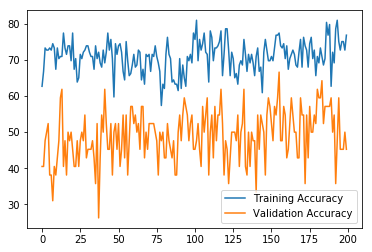

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 59.523809523809526%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:108 accuracy: 66.66666666666666%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
Best validation accuracy! iteration:810 accuracy: 69.04761904761905%
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

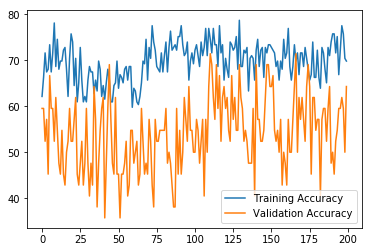

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 51.16279069767442%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 55.81395348837209%
epoch 3 
epoch 4 
Best validation accuracy! iteration:72 accuracy: 58.13953488372093%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:216 accuracy: 60.46511627906977%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 

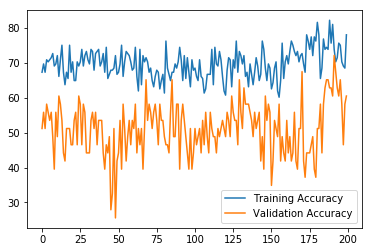

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 54.76190476190476%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:252 accuracy: 57.142857142857146%
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:306 accuracy: 66.66666666666666%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

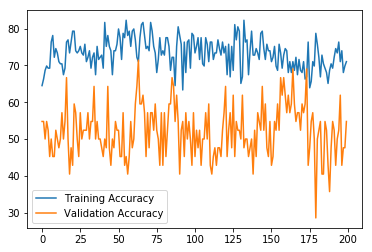

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 42.857142857142854%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 47.61904761904762%
epoch 3 
Best validation accuracy! iteration:54 accuracy: 52.38095238095238%
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 57.142857142857146%
epoch 6 
epoch 7 
Best validation accuracy! iteration:126 accuracy: 59.523809523809526%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:324 accuracy: 66.66666666666666%
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 

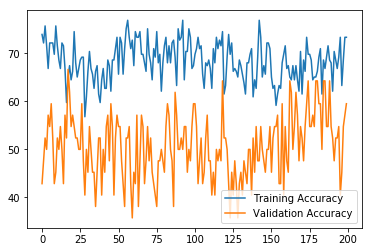

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 57.142857142857146%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 59.523809523809526%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
Best validation accuracy! iteration:810 accuracy: 66.66666666666666%
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

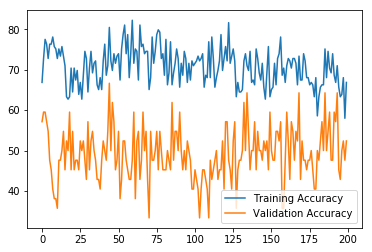

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 61.904761904761905%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 66.66666666666666%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch

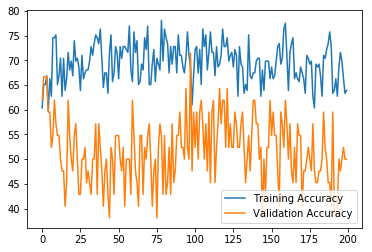

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 60.46511627906977%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:162 accuracy: 67.44186046511628%
epoch 10 
Best validation accuracy! iteration:180 accuracy: 69.76744186046511%
epoch 11 
epoch 12 
Best validation accuracy! iteration:216 accuracy: 72.09302325581396%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 5

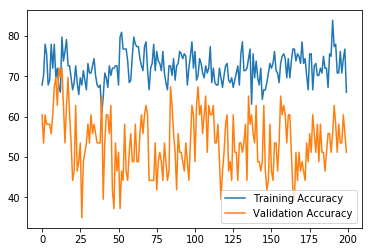

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 57.142857142857146%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
Best validation accuracy! iteration:756 accuracy: 61.904761904761905%
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epo

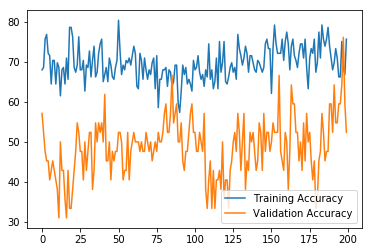

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 64.28571428571428%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
Best validation accuracy! iteration:576 accuracy: 66.66666666666666%
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
Best validation accuracy! iteration:828 accuracy: 69.04761904761905%
epoch 47 
epoch 48 
Best validation accuracy! iteration:864 accuracy: 71.42857142857143%
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 5

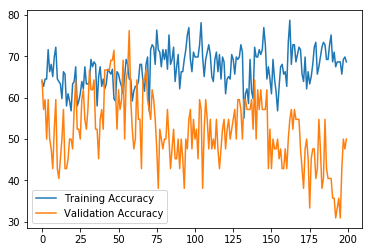

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 54.76190476190476%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 57.142857142857146%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 61.904761904761905%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:306 accuracy: 64.28571428571428%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 5

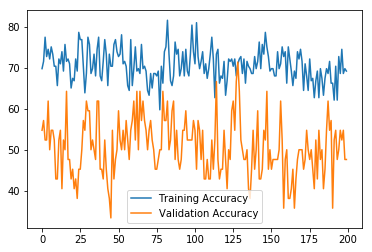

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 45.23809523809524%
epoch 2 
epoch 3 
Best validation accuracy! iteration:54 accuracy: 47.61904761904762%
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:108 accuracy: 50.0%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:252 accuracy: 54.76190476190476%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
Best validation accuracy! iteration:396 accuracy: 61.904761904761905%
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
e

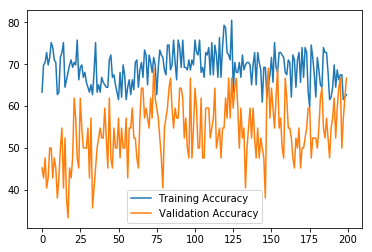

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 55.81395348837209%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 60.46511627906977%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:180 accuracy: 65.11627906976744%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 6

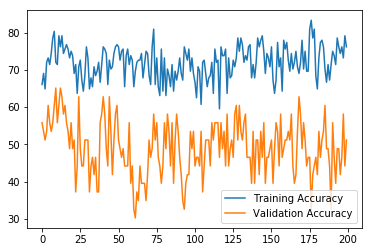

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 54.76190476190476%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 59.523809523809526%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
Best validation accuracy! iteration:414 accuracy: 64.28571428571428%
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 

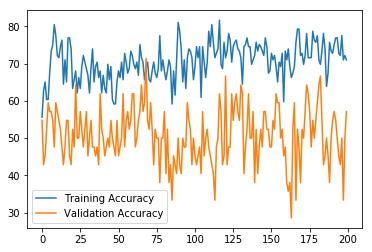

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 38.095238095238095%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 47.61904761904762%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:108 accuracy: 50.0%
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:162 accuracy: 54.76190476190476%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:360 accuracy: 61.904761904761905%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 


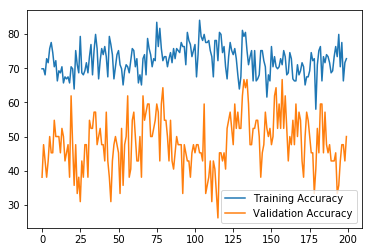

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 57.142857142857146%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:252 accuracy: 59.523809523809526%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:324 accuracy: 64.28571428571428%
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
Best validation accuracy! iteration:450 accuracy: 66.66666666666666%
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch

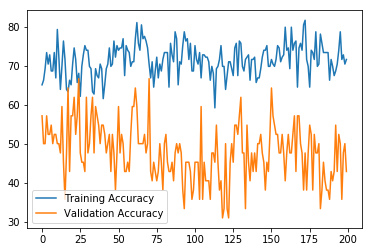

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 52.38095238095238%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:72 accuracy: 57.142857142857146%
epoch 5 
epoch 6 
Best validation accuracy! iteration:108 accuracy: 69.04761904761905%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 

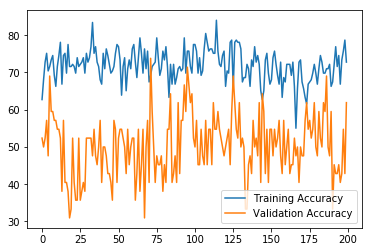

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 51.16279069767442%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 55.81395348837209%
epoch 3 
Best validation accuracy! iteration:54 accuracy: 58.13953488372093%
epoch 4 
Best validation accuracy! iteration:72 accuracy: 60.46511627906977%
epoch 5 
epoch 6 
Best validation accuracy! iteration:108 accuracy: 62.7906976744186%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
Best validation accuracy! iteration:468 accuracy: 65.11627906976744%
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epo

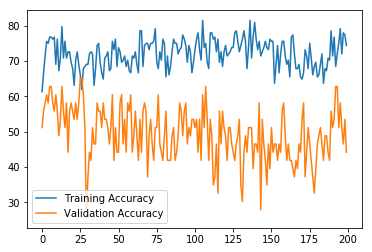

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 50.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:126 accuracy: 54.76190476190476%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:234 accuracy: 57.142857142857146%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62

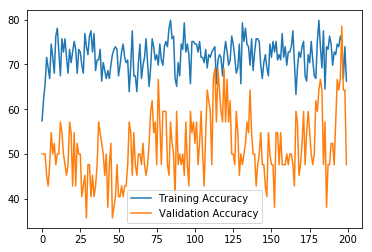

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 61.904761904761905%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:324 accuracy: 66.66666666666666%
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
Best validation accuracy! iteration:450 accuracy: 69.04761904761905%
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
Best validation accuracy! iteration:846 accuracy: 71.42857142857143%
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 

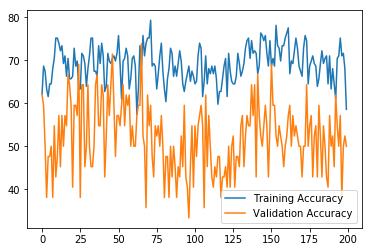

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 45.23809523809524%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:126 accuracy: 47.61904761904762%
epoch 8 
Best validation accuracy! iteration:144 accuracy: 59.523809523809526%
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:198 accuracy: 61.904761904761905%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
Best validation accuracy! iteration:468 accuracy: 64.28571428571428%
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 

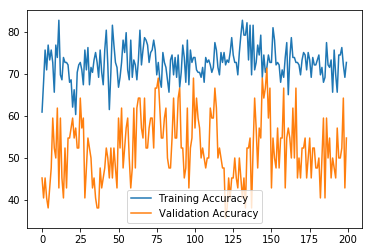

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 38.095238095238095%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 42.857142857142854%
epoch 3 
Best validation accuracy! iteration:54 accuracy: 52.38095238095238%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:162 accuracy: 54.76190476190476%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:360 accuracy: 57.142857142857146%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
Best validation accuracy! iteration:558 accuracy: 59.523809523809526%
epoch 32 
Best validation accuracy! iteration:576 accuracy: 73.80952380952381%
epoch 33

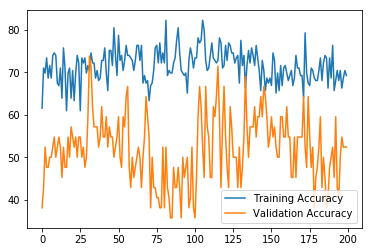

 average accuracy is:  70.62236987818383
 standard deviation is:  3.6085260697338124
Sensitivity mean:  0.6778947368421052
Sensitivity std:  0.06013834466141347
Specificity mean:  0.7297101449275363
Specificity std:  0.06025831811734744
F1s mean:  0.674586086617833
F1s std:  0.04004181731462165


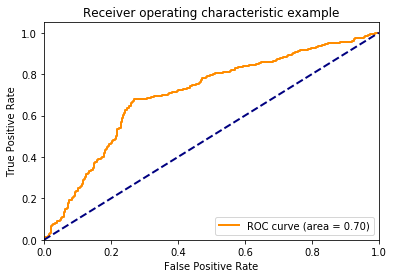

In [45]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_flexchannel import cnn_training
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn import metrics

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
result_accuracies=[]
result_sensitivity=[]
result_specificity=[]
result_f1s=[]
store_proba=[]
store_predictedv=[]
store_percent=[]

for train_index,test_index in rskf.split(Xnew,y_connectome):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xnew[train_index],Xnew[test_index]
    y_train,y_test=y_connectome[train_index],y_connectome[test_index]
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]

    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel,percentage=cnn_training(X_train,y_train,X_test,y_test,fc_units=[2000,100,2], 
                 conv_featmap=[5,5,5],l2_norm=0.1,seed=235,
                 learning_rate=1e-2,epoch=200,batch_size=9,imglen=164,channum=20)
    print(roc_pred)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()
    
    log_f1 = f1_score(roc_truelabel,roc_pred)
    log_confuse= metrics.confusion_matrix(roc_truelabel,roc_pred)
    TP = log_confuse[1, 1]
    TN = log_confuse[0, 0]
    FP = log_confuse[0, 1]
    FN = log_confuse[1, 0]
    log_sen=metrics.recall_score(roc_truelabel,roc_pred)
    log_spec=TN / (TN + FP)
    result_accuracies.append(record_acc)
    result_sensitivity.append(log_sen)
    result_specificity.append(log_spec)
    result_f1s.append(log_f1)
    
    probability=np.zeros([test_index.shape[0]])
    #index_percent=np.argmax(percentage,axis=1)
    for i in range(len(roc_pred)):
        if roc_pred[i]==0:
            probability[i]=percentage[i,1]
        else:
            probability[i]=percentage[i,1]
    store_proba.extend(probability)
    store_predictedv.extend(roc_pred)
    store_percent.extend(percentage)

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print(' average accuracy is: ',mean_acc)
print(' standard deviation is: ',mean_std)

mean_sen=np.mean(np.array(result_sensitivity))
std_sen=np.std(np.array(result_sensitivity))
mean_spec=np.mean(np.array(result_specificity))
std_spec=np.std(np.array(result_specificity))
mean_f1s=np.mean(np.array(result_f1s))
std_f1s=np.std(np.array(result_f1s))
print('Sensitivity mean: ',mean_sen)
print('Sensitivity std: ',std_sen)
print('Specificity mean: ',mean_spec)
print('Specificity std: ',std_spec)
print('F1s mean: ',mean_f1s)
print('F1s std: ',std_f1s)



fpr,tpr,_=roc_curve(truelabel,store_proba)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/embarc_project/Figures/both_all_curve_CNN.pdf')
plt.show()

scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_all_percentage.mat',mdict={'result':store_percent})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_all_truelabels.mat',mdict={'result':truelabel})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_all_predictedv.mat',mdict={'result':store_predictedv})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_all_probabilities.mat',mdict={'result':store_proba})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_all_sensitivity.mat',mdict={'result':result_sensitivity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_all_specificity.mat',mdict={'result':result_specificity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_all_f1s.mat',mdict={'result':result_f1s})

## Morph + Connectome + clinical

In [29]:
Xnew=np.concatenate((X_connectome,X_freesurf),axis=3)
print(Xnew.shape)

(211, 164, 164, 20)


Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 60.46511627906977%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:162 accuracy: 62.7906976744186%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 

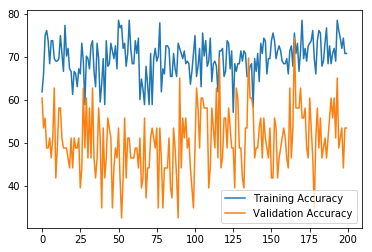

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 42.857142857142854%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 45.23809523809524%
epoch 3 
epoch 4 
Best validation accuracy! iteration:72 accuracy: 54.76190476190476%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:216 accuracy: 64.28571428571428%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54

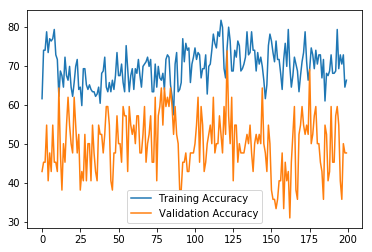

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 35.71428571428571%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 40.476190476190474%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 42.857142857142854%
epoch 6 
Best validation accuracy! iteration:108 accuracy: 45.23809523809524%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:180 accuracy: 50.0%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:252 accuracy: 54.76190476190476%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
Best validation accuracy! iteration:630 accuracy: 59.523809523

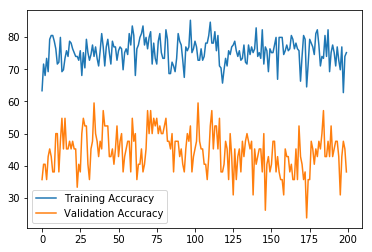

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 35.71428571428571%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 45.23809523809524%
epoch 3 
Best validation accuracy! iteration:54 accuracy: 52.38095238095238%
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:108 accuracy: 54.76190476190476%
epoch 7 
Best validation accuracy! iteration:126 accuracy: 59.523809523809526%
epoch 8 
epoch 9 
Best validation accuracy! iteration:162 accuracy: 64.28571428571428%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 


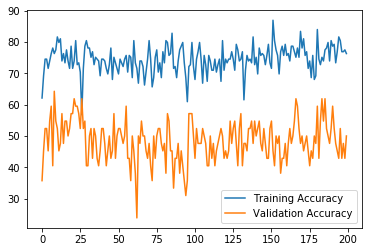

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 35.71428571428571%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 47.61904761904762%
epoch 3 
Best validation accuracy! iteration:54 accuracy: 52.38095238095238%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Best validation accuracy! iteration:900 accuracy: 54.76190476190476%
epoch 51 
epoch 52 
epoch 53 
epoch 54 

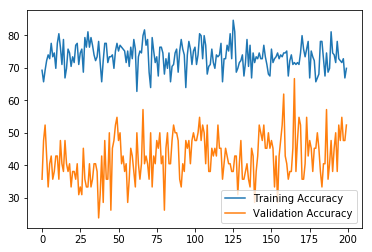

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 62.7906976744186%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 69.76744186046511%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:432 accuracy: 72.09302325581396%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61

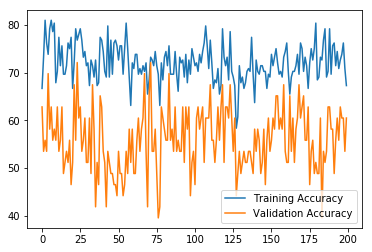

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 45.23809523809524%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 50.0%
epoch 3 
Best validation accuracy! iteration:54 accuracy: 52.38095238095238%
epoch 4 
Best validation accuracy! iteration:72 accuracy: 57.142857142857146%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:144 accuracy: 59.523809523809526%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
ep

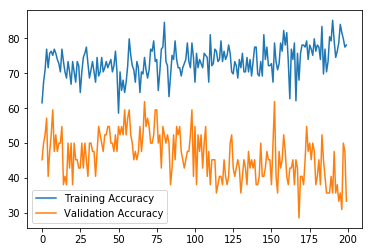

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 50.0%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 52.38095238095238%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:216 accuracy: 54.76190476190476%
epoch 13 
Best validation accuracy! iteration:234 accuracy: 61.904761904761905%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 


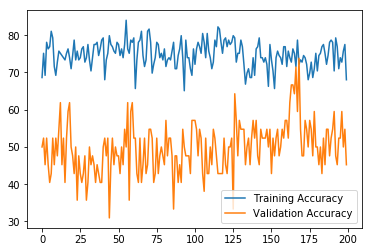

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 50.0%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 57.142857142857146%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 59.523809523809526%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:198 accuracy: 66.66666666666666%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 


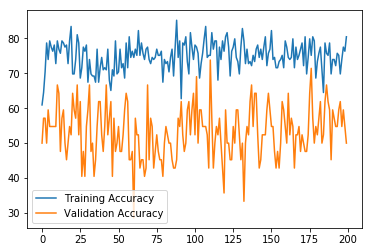

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 50.0%
epoch 2 
epoch 3 
Best validation accuracy! iteration:54 accuracy: 52.38095238095238%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:126 accuracy: 57.142857142857146%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:216 accuracy: 61.904761904761905%
epoch 13 
Best validation accuracy! iteration:234 accuracy: 71.42857142857143%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 


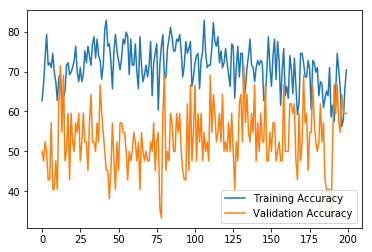

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 53.48837209302326%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:216 accuracy: 58.13953488372093%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
Best validation accuracy! iteration:450 accuracy: 60.46511627906977%
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
Best validation 

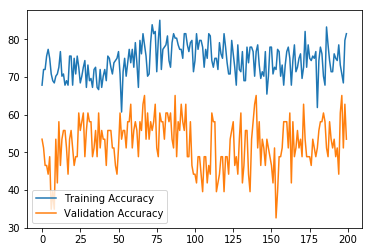

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 35.71428571428571%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 45.23809523809524%
epoch 3 
Best validation accuracy! iteration:54 accuracy: 47.61904761904762%
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 57.142857142857146%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 

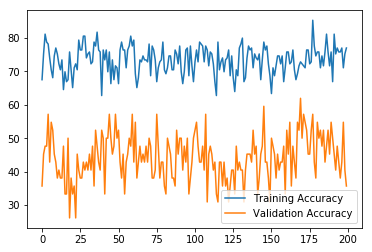

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 38.095238095238095%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 50.0%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 52.38095238095238%
epoch 6 
epoch 7 
Best validation accuracy! iteration:126 accuracy: 54.76190476190476%
epoch 8 
epoch 9 
Best validation accuracy! iteration:162 accuracy: 64.28571428571428%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
Best validation accuracy! iteration:720 accuracy: 69.04761904761905%
epoch 41 
epo

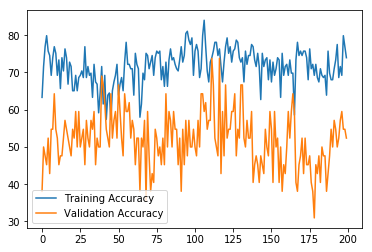

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 54.76190476190476%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 59.523809523809526%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
Best validation accuracy! iteration:504 accuracy: 61.904761904761905%
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

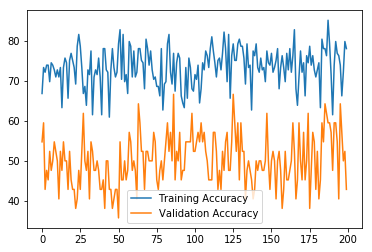

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 47.61904761904762%
epoch 2 
epoch 3 
Best validation accuracy! iteration:54 accuracy: 52.38095238095238%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:288 accuracy: 61.904761904761905%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
Best validation accuracy! iteration:378 accuracy: 64.28571428571428%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 5

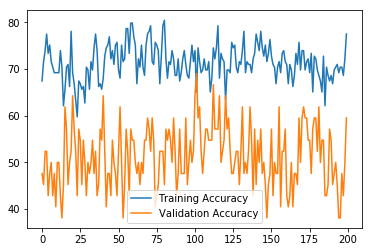

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 55.81395348837209%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:90 accuracy: 58.13953488372093%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:216 accuracy: 60.46511627906977%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
Best validation accuracy! iteration:936 accuracy: 62.7906976744186%
epoch 53 
epoch 54 

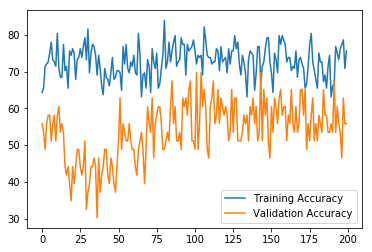

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 52.38095238095238%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 59.523809523809526%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:234 accuracy: 66.66666666666666%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 

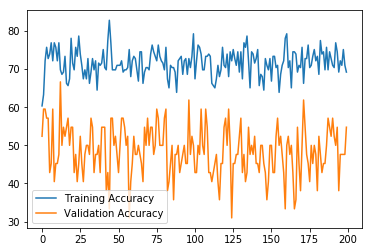

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 59.523809523809526%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:72 accuracy: 61.904761904761905%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
Best validation accuracy! iteration:468 accuracy: 69.04761904761905%
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch

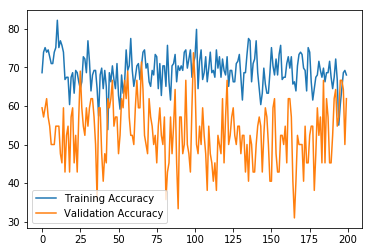

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 40.476190476190474%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 42.857142857142854%
epoch 3 
Best validation accuracy! iteration:54 accuracy: 45.23809523809524%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:162 accuracy: 47.61904761904762%
epoch 10 
Best validation accuracy! iteration:180 accuracy: 50.0%
epoch 11 
Best validation accuracy! iteration:198 accuracy: 54.76190476190476%
epoch 12 
epoch 13 
Best validation accuracy! iteration:234 accuracy: 57.142857142857146%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
Best validation accura

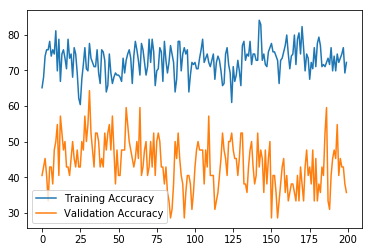

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 50.0%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 52.38095238095238%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:252 accuracy: 54.76190476190476%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:360 accuracy: 59.523809523809526%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
Best validation accuracy! iteration:486 accuracy: 61.904761904761905%
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 


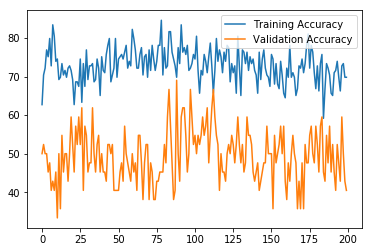

Number of training points:  (168,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 44.18604651162791%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 60.46511627906977%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:108 accuracy: 62.7906976744186%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
Best validation accuracy! iteration:396 accuracy: 65.11627906976744%
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 

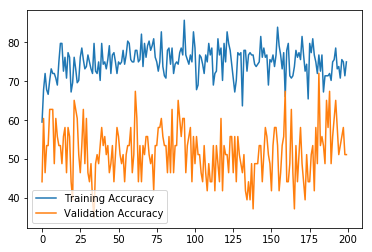

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 33.33333333333333%
epoch 2 
Best validation accuracy! iteration:36 accuracy: 40.476190476190474%
epoch 3 
Best validation accuracy! iteration:54 accuracy: 50.0%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:216 accuracy: 52.38095238095238%
epoch 13 
Best validation accuracy! iteration:234 accuracy: 64.28571428571428%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
ep

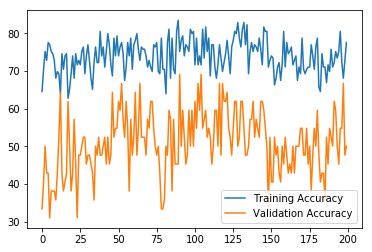

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 52.38095238095238%
epoch 2 
epoch 3 
Best validation accuracy! iteration:54 accuracy: 64.28571428571428%
epoch 4 
Best validation accuracy! iteration:72 accuracy: 66.66666666666666%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61

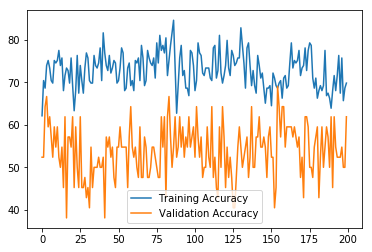

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 54.76190476190476%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:126 accuracy: 64.28571428571428%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
Best validation accuracy! iteration:522 accuracy: 66.66666666666666%
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 

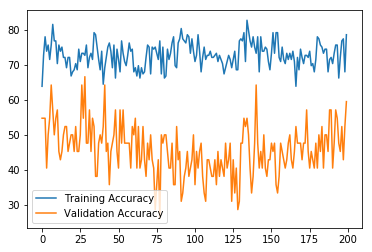

Number of training points:  (169,)
Number of testing points:  (42,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 18
epoch 1 
Best validation accuracy! iteration:18 accuracy: 59.523809523809526%
epoch 2 
epoch 3 
Best validation accuracy! iteration:54 accuracy: 66.66666666666666%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch

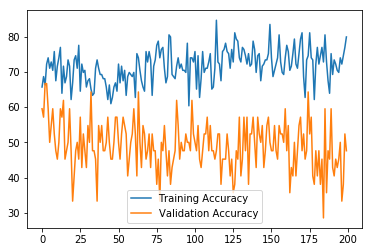

 average accuracy is:  68.61572535991141
 standard deviation is:  4.215183332890912
Sensitivity mean:  0.6463157894736843
Sensitivity std:  0.0706440494128948
Specificity mean:  0.7187681159420289
Specificity std:  0.06455029187102349
F1s mean:  0.648811976560372
F1s std:  0.04867568549799012


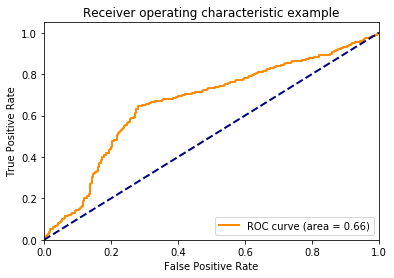

In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_flex_merge import cnnfm_training
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn import metrics

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]

result_accuracies=[]
result_sensitivity=[]
result_specificity=[]
result_f1s=[]

store_proba=[]

store_predictedv=[]
store_percent=[]

store_demos=[]
store_deltas=[]

for train_index,test_index in rskf.split(Xnew,y_connectome):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xnew[train_index],Xnew[test_index]
    y_train,y_test=y_connectome[train_index],y_connectome[test_index]
    X_trainvar,X_valvar=Xvar[train_index],Xvar[test_index]
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]
    X_trainvar=X_trainvar[mask_train,:]
    _,tracking_del=delta_track[train_index],delta_track[test_index]

    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel,percentage=cnnfm_training(X_train,y_train,X_trainvar,X_test,y_test,X_valvar,addedvar_num=13,fc_units=[2000,100,2], 
                 conv_featmap=[5,5,5],l2_norm=0.1,seed=235,
                 learning_rate=1e-2,epoch=200,batch_size=9,imglen=164,channum=20)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()
    
    log_f1 = f1_score(roc_truelabel,roc_pred)
    log_confuse= metrics.confusion_matrix(roc_truelabel,roc_pred)
    TP = log_confuse[1, 1]
    TN = log_confuse[0, 0]
    FP = log_confuse[0, 1]
    FN = log_confuse[1, 0]
    log_sen=metrics.recall_score(roc_truelabel,roc_pred)
    log_spec=TN / (TN + FP)
    result_accuracies.append(record_acc)
    result_sensitivity.append(log_sen)
    result_specificity.append(log_spec)
    result_f1s.append(log_f1)
    
    probability=np.zeros([test_index.shape[0]])
    #index_percent=np.argmax(percentage,axis=1)
    for i in range(len(roc_pred)):
        if roc_pred[i]==0:
            probability[i]=percentage[i,1]
        else:
            probability[i]=percentage[i,1]
    store_proba.extend(probability)
    store_predictedv.extend(roc_pred)
    store_percent.extend(percentage)
    
    store_demos.append(X_valvar)
    store_deltas.extend(tracking_del)

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print(' average accuracy is: ',mean_acc)
print(' standard deviation is: ',mean_std)

mean_sen=np.mean(np.array(result_sensitivity))
std_sen=np.std(np.array(result_sensitivity))
mean_spec=np.mean(np.array(result_specificity))
std_spec=np.std(np.array(result_specificity))
mean_f1s=np.mean(np.array(result_f1s))
std_f1s=np.std(np.array(result_f1s))
print('Sensitivity mean: ',mean_sen)
print('Sensitivity std: ',std_sen)
print('Specificity mean: ',mean_spec)
print('Specificity std: ',std_spec)
print('F1s mean: ',mean_f1s)
print('F1s std: ',std_f1s)



fpr,tpr,_=roc_curve(truelabel,store_proba)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/embarc_project/Figures/both_conall_wclinical_curve_CNN.pdf')
plt.show()

scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_wclinical_percentage.mat',mdict={'result':store_percent})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_wclinical_truelabels.mat',mdict={'result':truelabel})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_wclinical_predictedv.mat',mdict={'result':store_predictedv})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_wclinical_probabilities.mat',mdict={'result':store_proba})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_wclinical_sensitivity.mat',mdict={'result':result_sensitivity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_wclinical_specificity.mat',mdict={'result':result_specificity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_wclinical_f1s.mat',mdict={'result':result_f1s})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_wclinical_deltas.mat',mdict={'result':store_deltas})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/both_conall_wclinical_demos.mat',mdict={'result':store_demos})

        